<h1 style="text-align:center;">Final Project – Breast Cancer Wisconsin Classification</h1>

<p style="text-align:center; font-size:18px;">
<strong>Author:</strong> Yifeng Huang &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<strong>Email:</strong> hyif@umich.edu &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<strong>UMID:</strong> 09130484
</p>



## 1. Load and Inspect the Dataset


In [242]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Basic preview
display(df.head())
print("Shape:", df.shape)
print("\nClass distribution:")
print(df["target"].value_counts())


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Shape: (569, 31)

Class distribution:
target
1    357
0    212
Name: count, dtype: int64


In [244]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

print("\nStatistical Summary:")
display(df.describe())


Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Data types:
mean radius                float64
mean texture 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


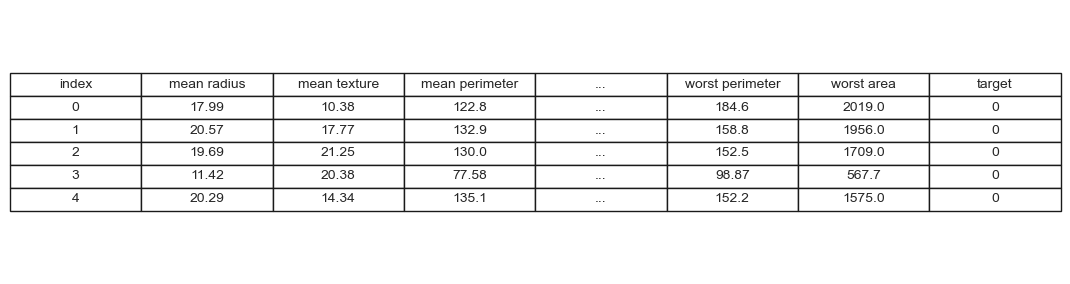

In [246]:
# === Generate and Display a Representative Sample Table with Ellipsis (Expanded Width) ===
import matplotlib.pyplot as plt
import pandas as pd

# Choose representative columns
front_cols = ["mean radius", "mean texture", "mean perimeter"]
back_cols = ["worst perimeter", "worst area", "target"]

head_df = df.loc[:4, front_cols + back_cols].copy()

# Insert ellipsis column
head_df.insert(len(front_cols), "...", ["..."] * len(head_df))

# Add index as first column
head_df.insert(0, "index", head_df.index)

# Wider figure size to prevent text squeezing
fig, ax = plt.subplots(figsize=(11, 3.0))   

ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=head_df.values,
    colLabels=head_df.columns,
    loc='center',
    cellLoc='center'
)

# Increase font readability
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjust cell scaling to give columns more room
table.scale(1.3, 1.2)   

plt.tight_layout()

plt.savefig("sample_head_table.png", dpi=300, bbox_inches='tight')  
plt.show()   
plt.close()


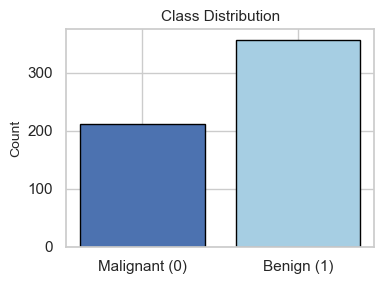

In [294]:
# === Generate class_distribution.png ===
counts = df['target'].value_counts().sort_index()

plt.figure(figsize=(4, 3))

# IEEE-friendly muted blue palette
colors = ['#4C72B0', '#A6CEE3']   

plt.bar(['Malignant (0)', 'Benign (1)'], counts, 
        color=colors, edgecolor='black')

plt.title("Class Distribution", fontsize=11)
plt.ylabel("Count", fontsize=10)
plt.tight_layout()

plt.savefig("class_distribution.png", dpi=300)  
plt.show()   
plt.close()



In [250]:
df.to_csv("breast_cancer_full_dataset.csv", index=True)


## Part 1 — Data Loading & Initial Inspection

In this section, I load the **Breast Cancer Wisconsin dataset** from `sklearn.datasets` and convert it into a pandas DataFrame for inspection.

### **Dataset Overview**
- **569 samples**
- **30 numerical features + 1 target label**
- Each row represents a tumor sample with morphological measurements extracted from cell nuclei images.

### **Target Distribution**
- **357 benign**
- **212 malignant**

The dataset is slightly imbalanced but still suitable for binary classification.

### **Data Quality Check**
- **No missing values** across all columns  
- All features are numeric (`float64`), target is `int32`  
- Dataset is clean and ready for preprocessing such as scaling

### **Statistical Summary Highlights**
- Feature ranges vary widely (e.g., mean area ranges from ~143 to ~2501)
- Several features show right-skewed distributions  

These observations suggest that **feature scaling will be necessary**, especially for models like SVM and MLP.

## Part 2: Exploratory Data Analysis (EDA)


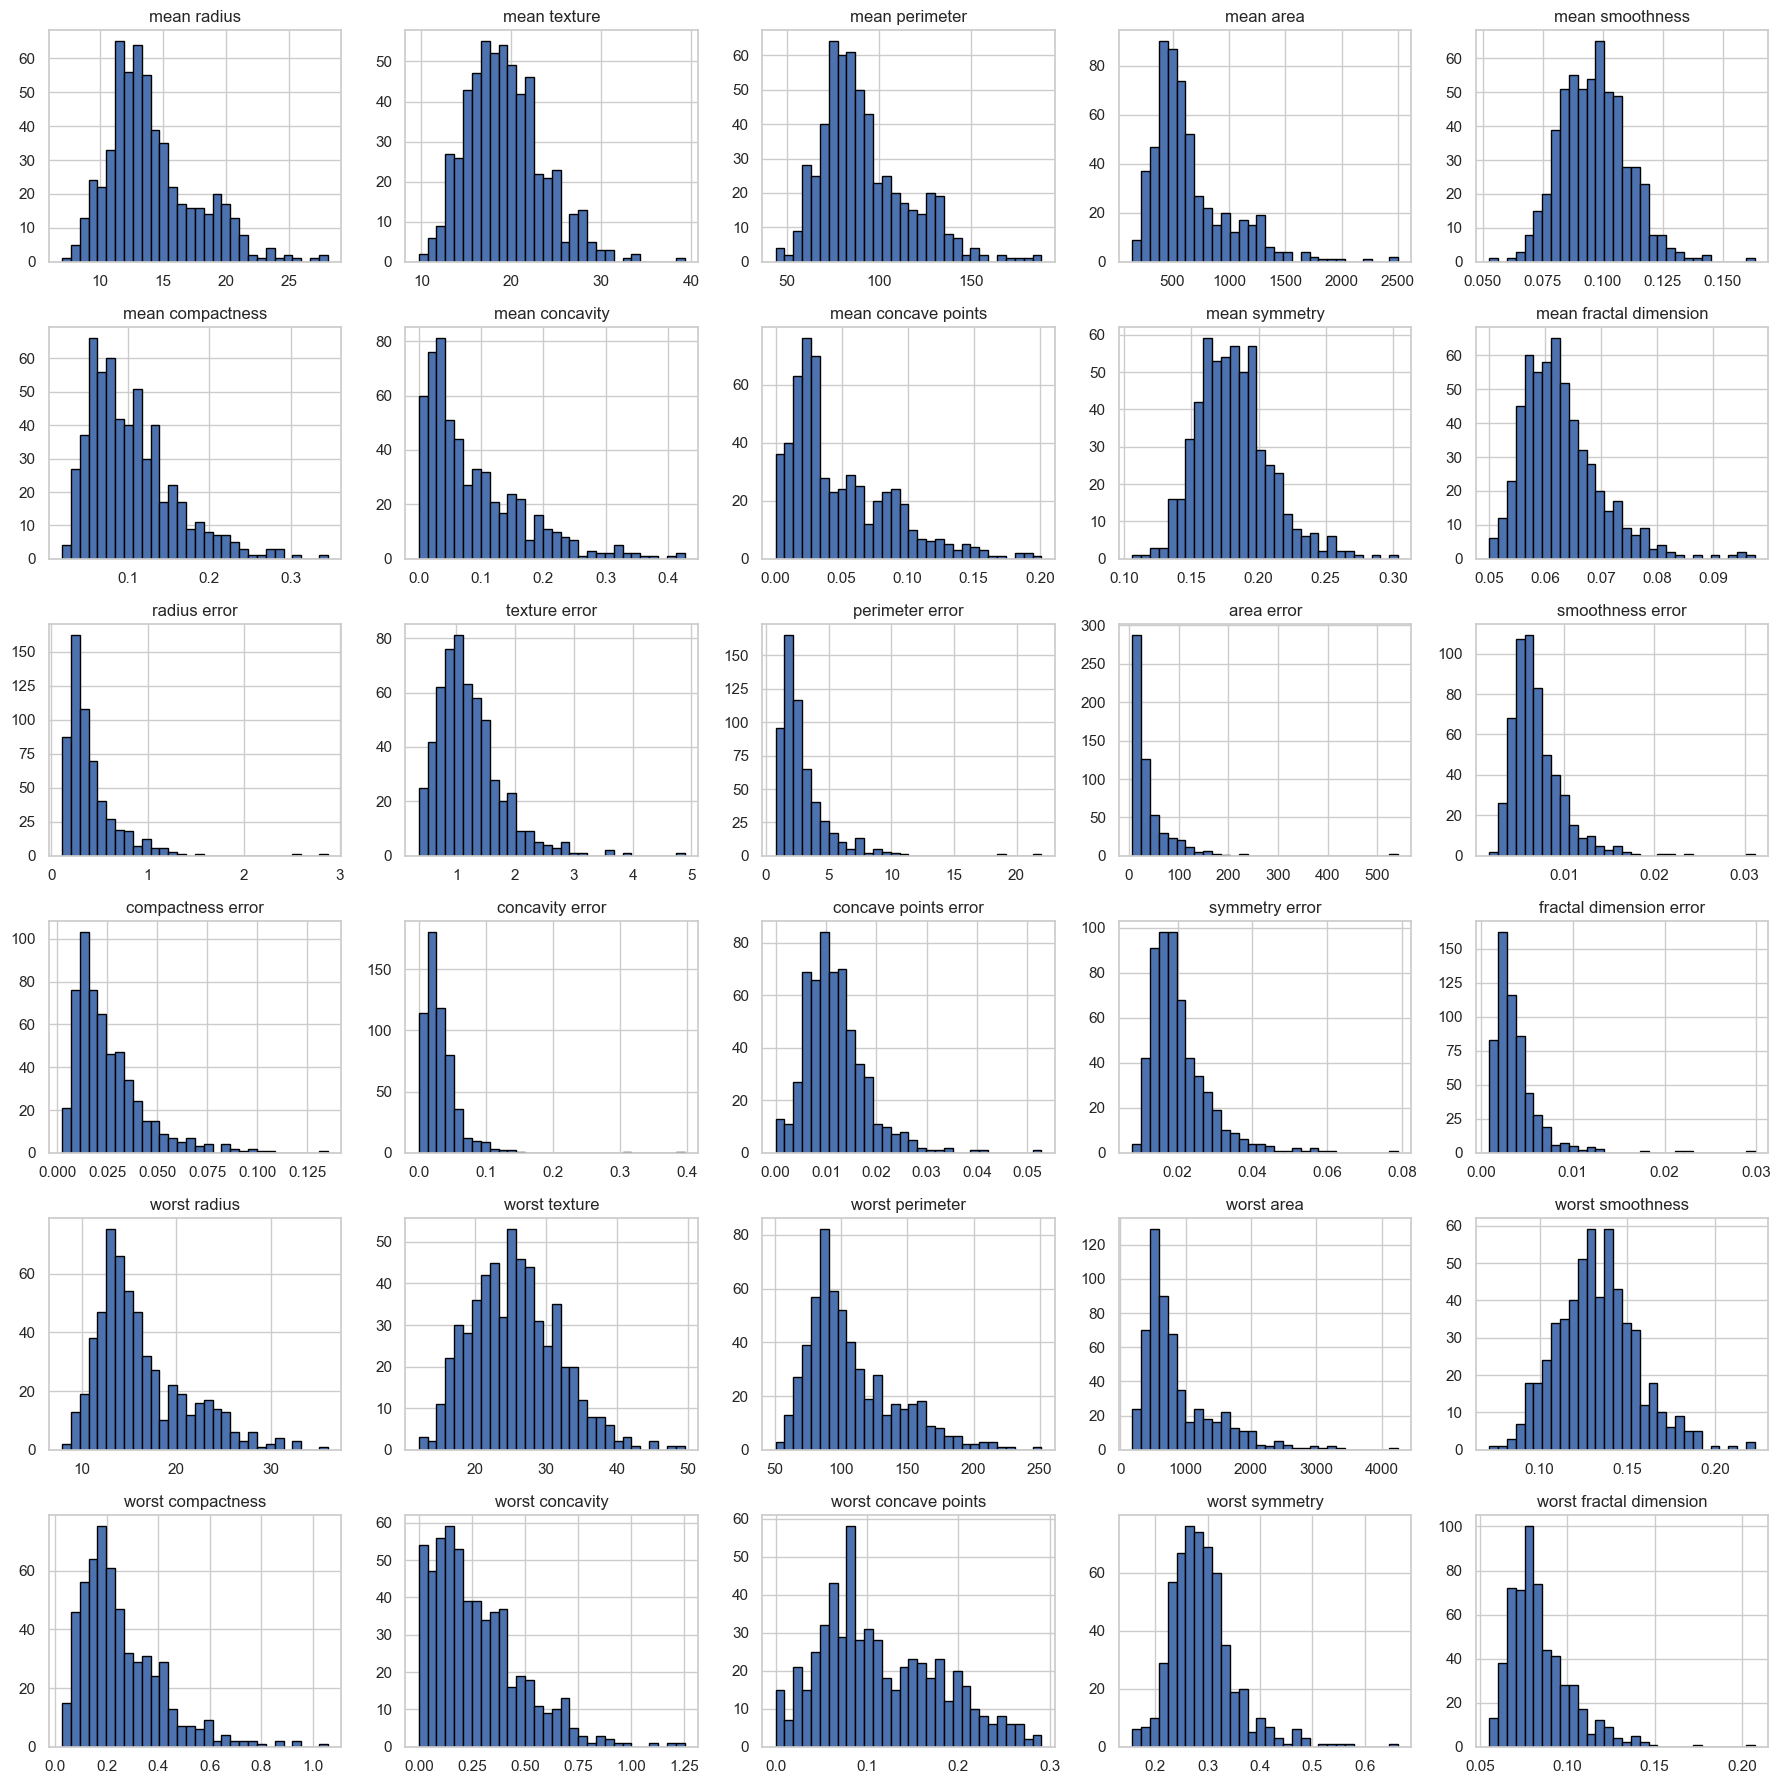

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot histograms for all features
df.iloc[:, :-1].hist(figsize=(18, 18), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


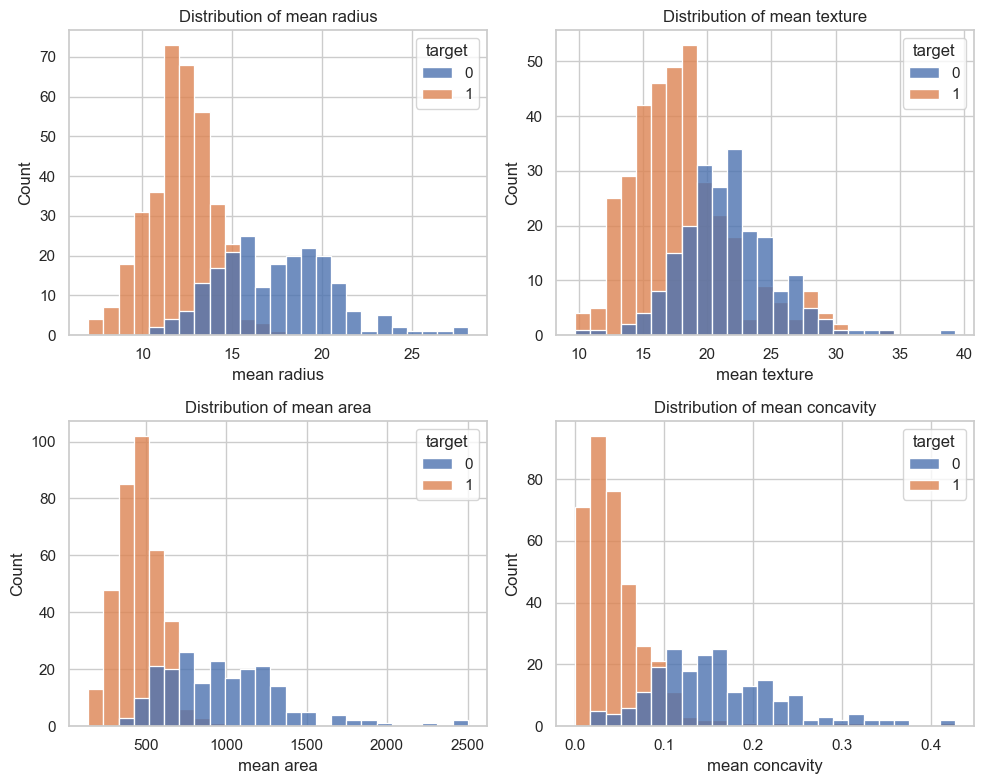

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["mean radius", "mean texture", "mean area", "mean concavity"]

plt.figure(figsize=(10, 8))

for i, feat in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feat, hue="target", bins=25, kde=False,
                 palette={0: "#4C72B0", 1: "#DD8452"}, alpha=0.8)
    plt.title(f"Distribution of {feat}")
    plt.xlabel(feat)
    plt.ylabel("Count")

plt.tight_layout()

# Save to local folder
plt.savefig("hist_selected.png", dpi=300)
plt.show()
plt.close()


### Part 2 – Exploratory Data Analysis: Feature Distributions (Summary)

To understand the characteristics of the dataset, I plotted histograms for all 30 numerical features.  
Several consistent patterns appear:

- **Most features are right-skewed**, especially error-related and “worst” measurements.  
  This indicates the presence of a small number of samples with unusually large values.

- **Core morphology features** (e.g., mean radius, mean perimeter, mean area) show clear spread
  and variability, suggesting they may carry strong discriminative power.

- **Smoothness, symmetry, fractal dimension** features are more narrowly distributed,
  reflecting lower variability across samples.

- Overall, the histograms show that many features differ substantially in scale and variance,
  highlighting the need for **feature scaling** before training SVM or neural network models.

These visual patterns will guide later steps such as scaling, feature selection, and model design.


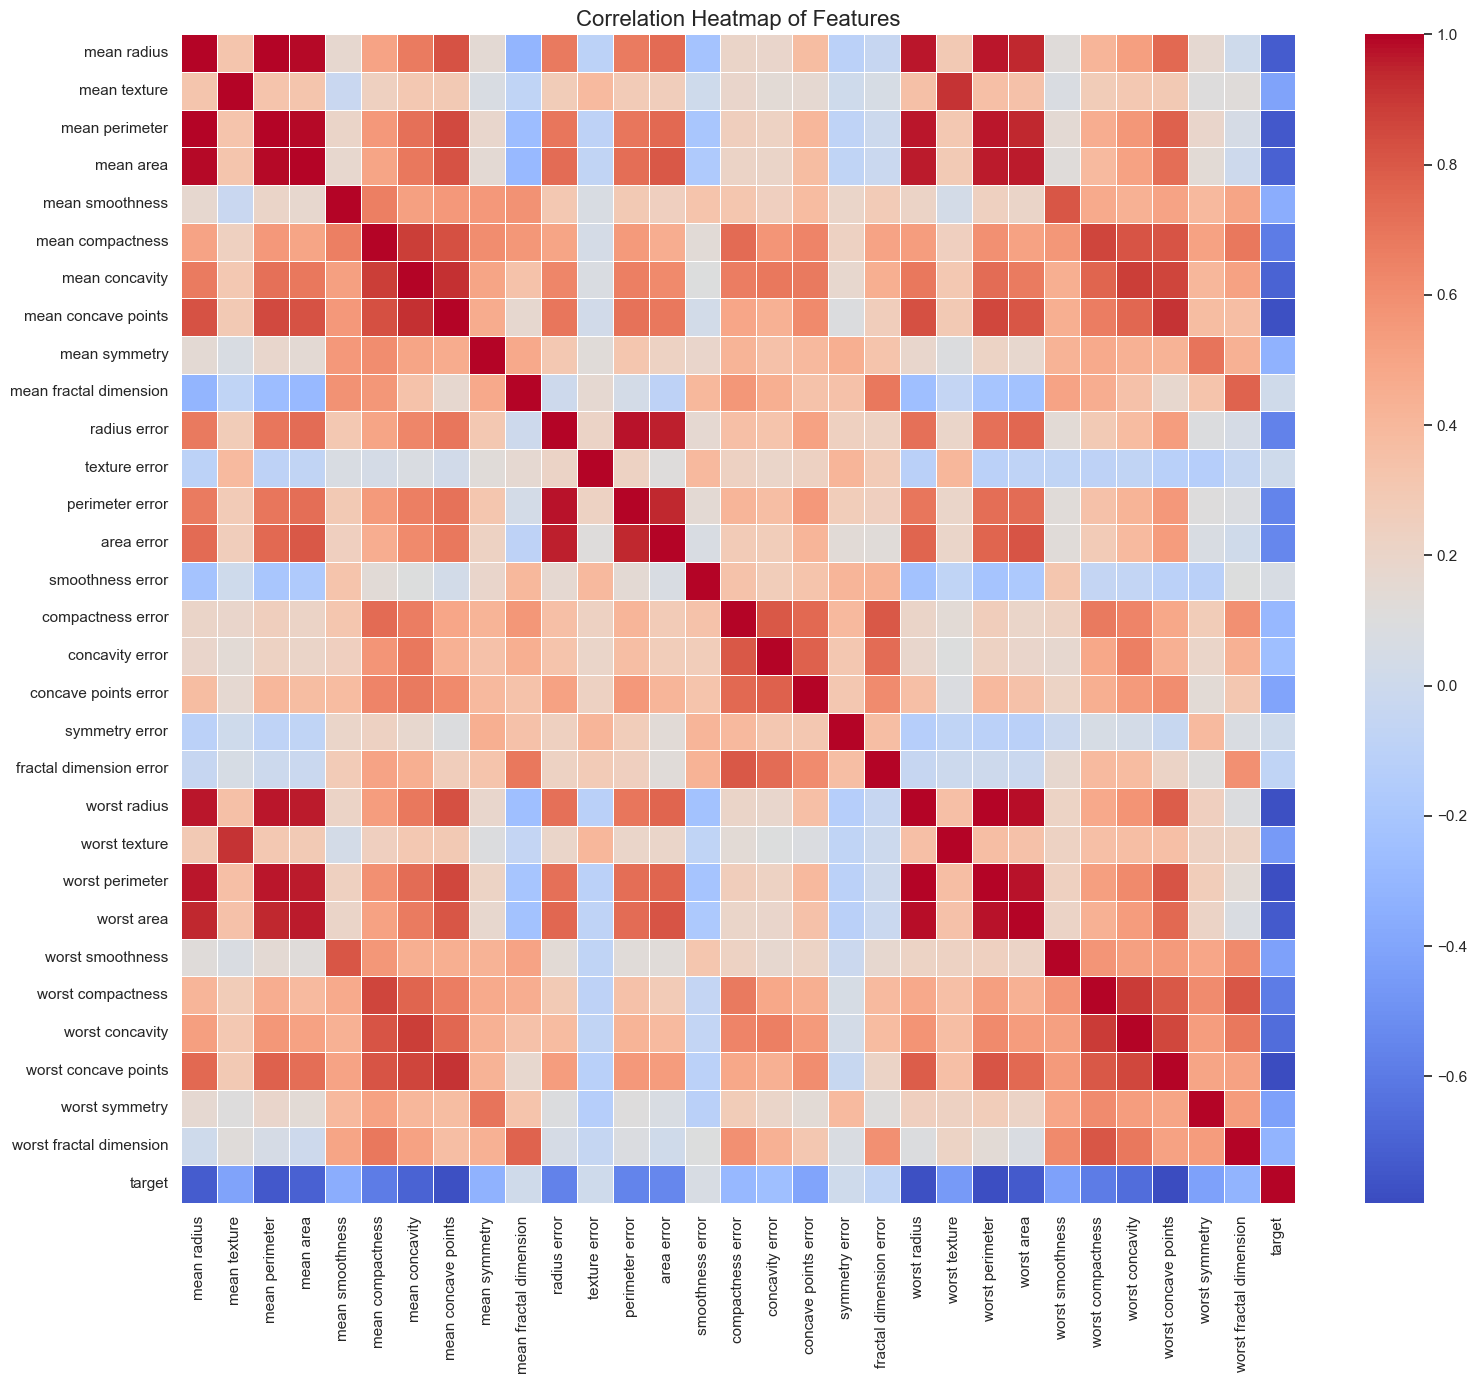

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 14))

corr_matrix = df.corr()

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    linewidths=0.5,
    annot=False
)

plt.title("Correlation Heatmap of Features", fontsize=16)
plt.tight_layout()

plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

plt.close()


### Part 2 — Feature Correlation Analysis

To better understand relationships among the 30 numerical features, I computed a **correlation matrix** and visualized it using a heatmap.

#### **Key Observations**
- Several groups of features are *highly correlated*, especially:
  - **mean radius**, **mean perimeter**, **mean area**, and their corresponding *worst* values  
  - **concavity**, **compactness**, and **concave points**  
- These strong correlations indicate that many features describe similar morphological characteristics and may be partially redundant.
- The target label shows strong positive correlation with:
  - **worst radius**, **worst perimeter**, **worst area**, etc.  
  This suggests tumor size–related measurements are influential for predicting malignancy.

#### **Implications**
- Feature scaling will be important when training SVM and MLP models.
- High multicollinearity may affect some linear models but does **not harm** tree-based or MLP models.
- Strongly correlated groups may motivate dimensionality reduction in later experiments (optional).



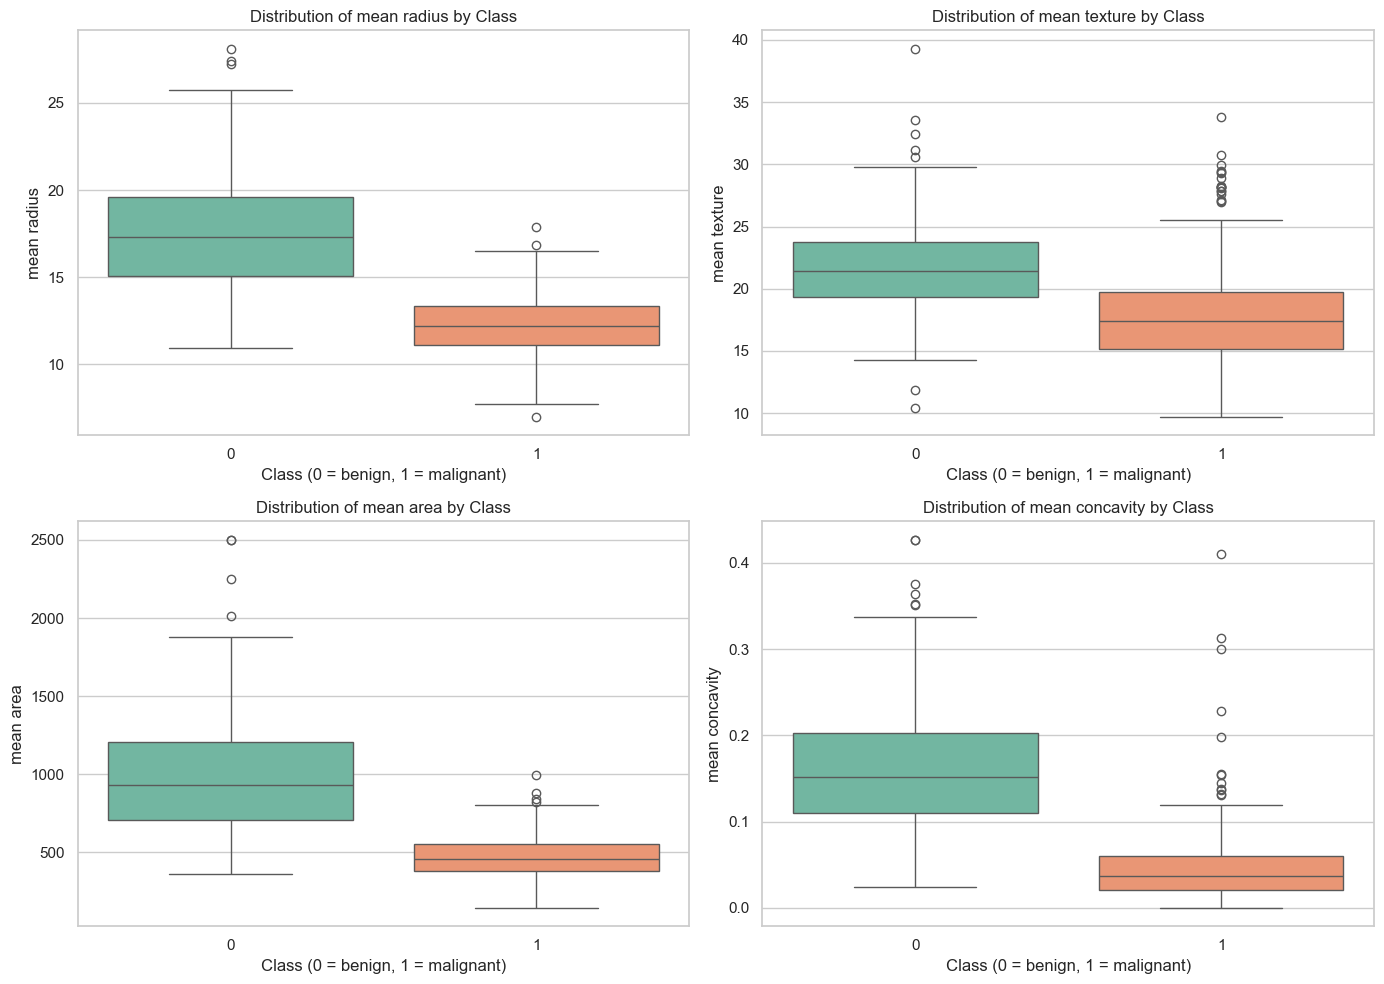

Saved as boxplot_features.png


In [262]:
# === Boxplots for Selected Features ===
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ["mean radius", "mean texture", "mean area", "mean concavity"]

plt.figure(figsize=(14, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=df,
        x="target",
        y=feature,
        hue="target",
        palette="Set2",
        dodge=False
    )
    
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel("Class (0 = benign, 1 = malignant)")
    plt.legend([], [], frameon=False)

plt.tight_layout()

plt.savefig("boxplot_features.png", dpi=300, bbox_inches="tight")

plt.show()

print("Saved as boxplot_features.png")


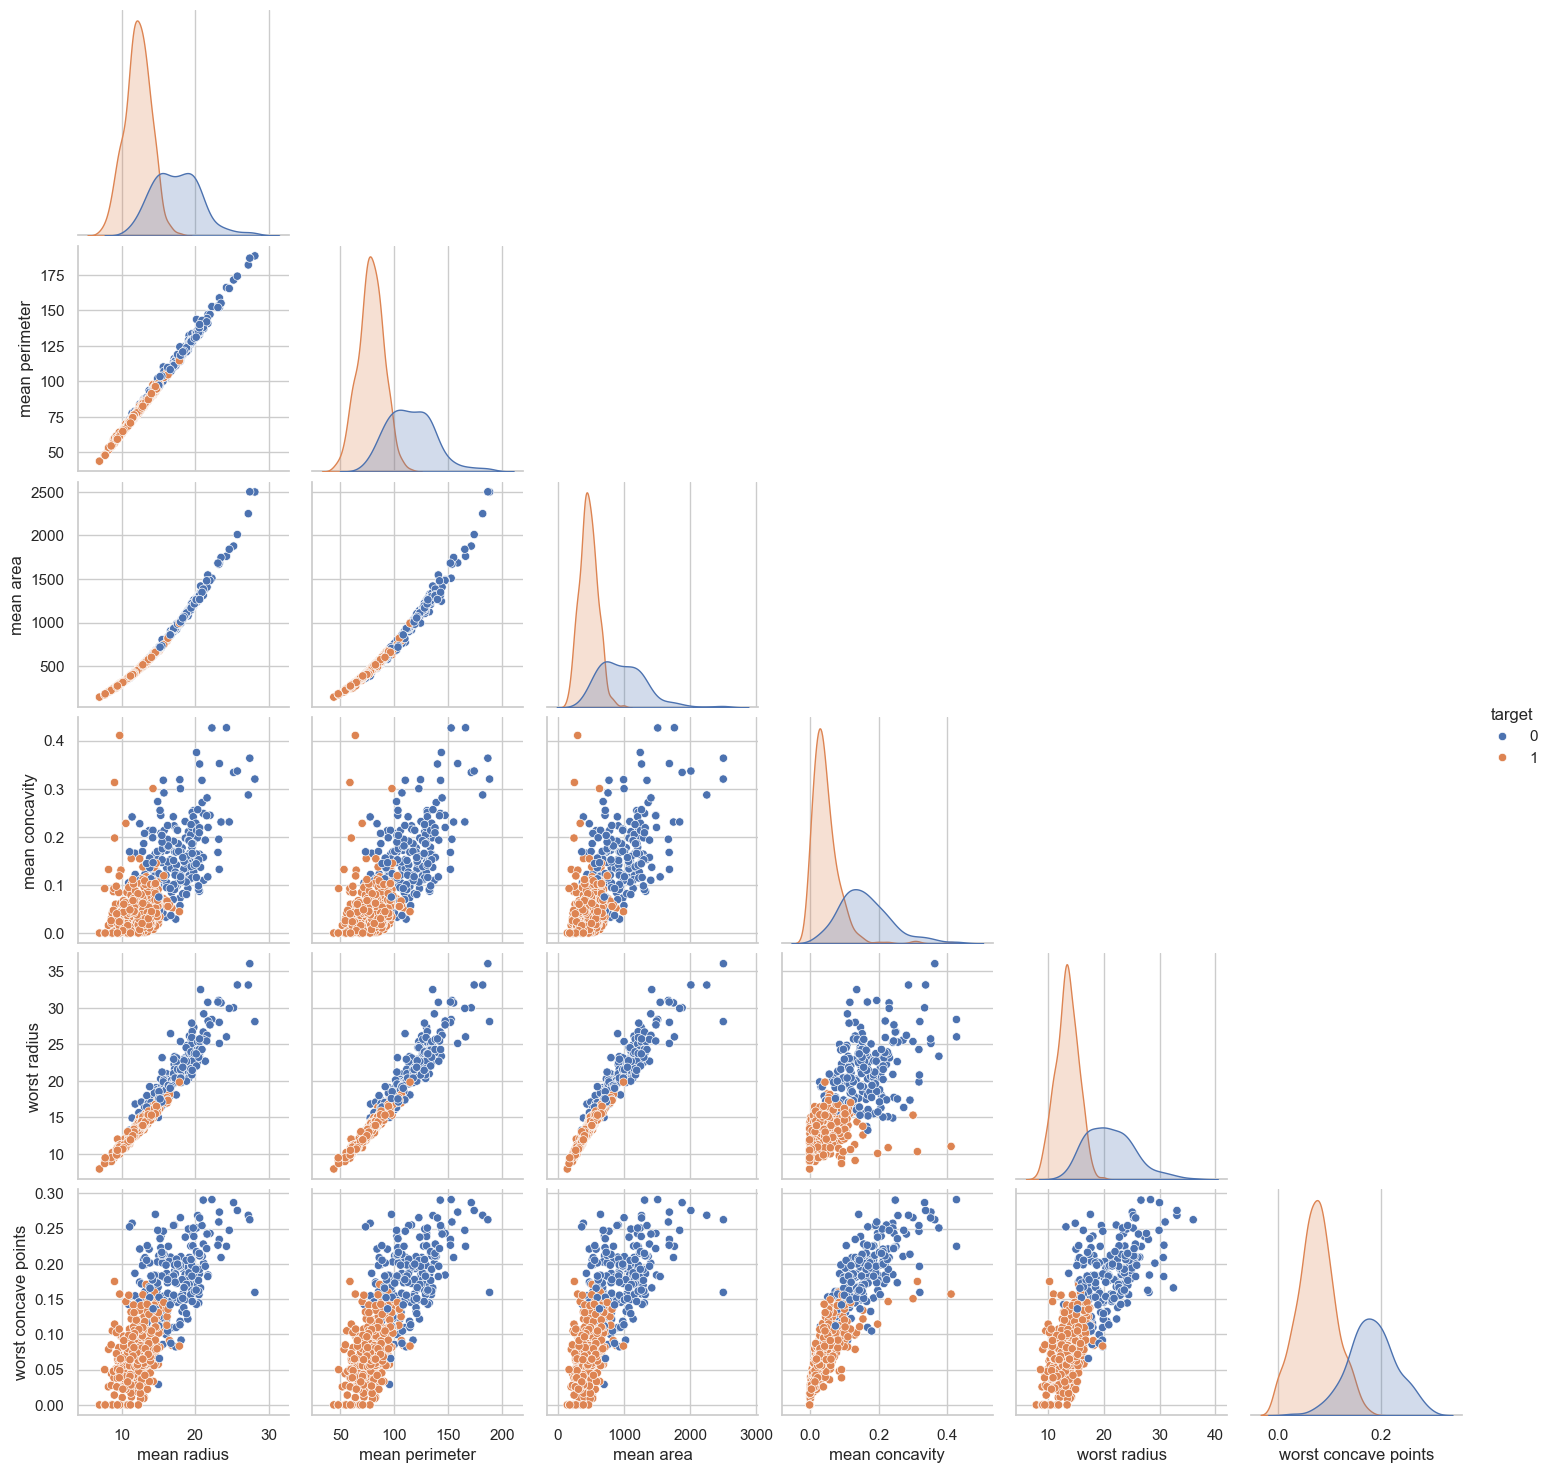

In [264]:
# Pairplot of selected strong features
import seaborn as sns

selected_features = [
    "mean radius",
    "mean perimeter",
    "mean area",
    "mean concavity",
    "worst radius",
    "worst concave points",
    "target"
]

sns.pairplot(df[selected_features], hue="target", diag_kind="kde", corner=True)
plt.show()


### **2.3 Boxplots by Class**

Boxplots of selected features (*mean radius, mean texture, mean area, mean concavity*) across benign (0) and malignant (1) samples show:

- Malignant tumors typically have **larger values** in shape-related measurements (radius, perimeter, area).
- Benign tumors tend to have **smaller concavity and concave point values**.
- The separation in distributions indicates these features carry strong predictive power.

---

### **2.4 Pairplot of Selected Features**

The pairplot highlights relationships among six important features:

- Scatter plots show **clear clustering patterns** between benign and malignant tumors.
- Strong positive relationships (e.g., radius ↔ perimeter ↔ area) appear visually as well.
- KDE plots show malignant cases often shift toward **higher values** in these key features.

Overall, EDA indicates the dataset has:

- Meaningful separation between classes  
- Strong correlations across groups of morphological features  
- Skewed distributions requiring normalization  

These insights will guide preprocessing and the design of the SVM baseline and MLP models.


## Part 3 — Baseline Model: Support Vector Machine (SVM)

In [268]:
# Part 3: Baseline Model — SVM Classifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Feature Scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train shape: (398, 30)
Test shape: (171, 30)


In [270]:
# Train SVM Classifier
svm_clf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_clf.predict(X_test_scaled)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("=== SVM Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== SVM Performance ===
Accuracy: 0.9766081871345029
Precision: 0.9813084112149533
Recall: 0.9813084112149533
F1 score: 0.9813084112149533

Confusion Matrix:
[[ 62   2]
 [  2 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### Part 3 — Baseline Model: SVM Classifier

In this section, I train a baseline Support Vector Machine (SVM) classifier on the Breast Cancer Wisconsin dataset. Before fitting the model, the data is divided into **70% training** and **30% testing**, with stratified sampling to maintain class balance.

---

#### **Train/Test Split (70/30)**

The dataset is split into:

- **Training set:** 398 samples  
- **Test set:** 171 samples  

Using a larger test set provides a more reliable evaluation of model generalization while preserving sufficient data for training.

---

#### **Feature Scaling**

SVM models are sensitive to feature magnitudes, so **StandardScaler** is applied:

- The scaler is **fit on the training data only**
- The same parameters (mean and standard deviation) are applied to transform both the training and test sets  
  → This prevents data leakage and ensures consistent feature scaling.

---

#### **SVM Training**

A Support Vector Machine with:

- **RBF kernel**
- **C = 1.0**
- **gamma = "scale"**

is trained on the scaled training data.  
The RBF kernel allows the model to capture complex, non-linear decision boundaries.

---

#### **Model Performance on the Test Set**

The SVM achieves strong performance:

- **Accuracy:** ~0.977  
- **Precision:** ~0.981  
- **Recall:** ~0.981  
- **F1-score:** ~0.981  

The confusion matrix indicates the model makes very few mistakes:

- Out of **171 test samples**, the SVM misclassifies **4 samples in total**  
  (2 benign predicted as malignant, and 2 malignant predicted as benign)

This corresponds to a very low error rate of **approximately 2.34%**.

Both classes (0 = benign, 1 = malignant) achieve high precision and recall, demonstrating that the classifier is well-balanced and performs consistently across categories.

---

#### **Summary**

The SVM baseline model demonstrates excellent predictive performance with only a few misclassifications.  
This provides a solid benchmark for comparison with the more flexible, learnable **PyTorch MLP model** that will be developed next.


## Part 4 — PyTorch MLP Model


In [274]:
# Part 4 – Deep Learning Model (PyTorch MLP)
# Step 1: Prepare data for PyTorch

import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert NumPy arrays (scaled training and test data) into PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.astype('float32'))
X_test_tensor  = torch.tensor(X_test_scaled.astype('float32'))

# Convert pandas Series -> NumPy -> tensor
y_train_tensor = torch.tensor(y_train.to_numpy().astype('int64'))
y_test_tensor  = torch.tensor(y_test.to_numpy().astype('int64'))

# Create TensorDataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Training samples:", len(train_dataset))
print("Test samples:", len(test_dataset))


Training samples: 398
Test samples: 171


In [276]:
# Step 2: Define 2-layer MLP model

import torch.nn as nn
import torch.optim as optim

# Reproducibility
torch.manual_seed(42)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Input / output dimensions
input_dim  = X_train_tensor.shape[1]   # 30 features
hidden_dim1 = 64
hidden_dim2 = 32                      # keep 2 hidden layers
output_dim  = 2                       # binary classification

# Define a 2-layer MLP
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim1),

            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim2),

            nn.Linear(hidden_dim2, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# Instantiate model, loss, optimizer
model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

print(model)



Using device: cpu
MLP(
  (net): Sequential(
    (0): Linear(in_features=30, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [278]:
# Step 3: Train the MLP (with loss history)

num_epochs = 50   
loss_history = [] 

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward & optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)

    # average loss for this epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    loss_history.append(epoch_loss)  

    # print every 10 epochs
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch [{epoch}/{num_epochs}] - Training loss: {epoch_loss:.4f}")


Epoch [1/50] - Training loss: 0.5600
Epoch [10/50] - Training loss: 0.0705
Epoch [20/50] - Training loss: 0.0215
Epoch [30/50] - Training loss: 0.0165
Epoch [40/50] - Training loss: 0.0245
Epoch [50/50] - Training loss: 0.0234


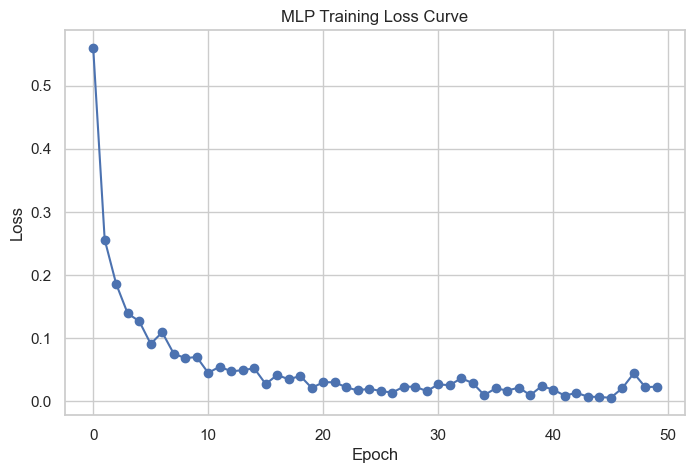

In [280]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(loss_history, marker='o')
plt.title("MLP Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [282]:
# Save the training curve to local folder
plt.figure(figsize=(8, 5))
plt.plot(loss_history, marker='o')
plt.title("MLP Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.savefig("mlp_training_curve.png", dpi=300, bbox_inches='tight')
plt.close()


In [284]:
# Step 4: Evaluate the trained MLP model
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

model.eval()   # put model in evaluation mode

all_preds = []
all_labels = []

with torch.no_grad():   # no gradient needed
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(X_batch)

        # For CrossEntropyLoss, predictions = argmax over logits
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Compute metrics
acc  = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds)
rec  = recall_score(all_labels, all_preds)
f1   = f1_score(all_labels, all_preds)

print("=== MLP Test Performance ===")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

print("\nClassification Report:")
print(classification_report(all_labels, all_preds))


=== MLP Test Performance ===
Accuracy: 0.9707602339181286
Precision: 0.9722222222222222
Recall: 0.9813084112149533
F1 score: 0.9767441860465116

Confusion Matrix:
[[ 61   3]
 [  2 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Part 5 — Comparison: SVM Baseline vs. PyTorch MLP

In this section, I compare the performance of the **baseline SVM classifier** and the **two–layer MLP neural network** trained with PyTorch.  
The goal is to determine whether the deep learning model provides meaningful improvements beyond the classical machine-learning baseline.

---

### **1. Summary of Test Performance**

| Model | Accuracy | Precision | Recall | F1-score | Test size |
|-------|----------|-----------|--------|----------|-----------|
| **SVM (RBF kernel)** | **0.9766** | **0.9813** | **0.9813** | **0.9813** | 171 |
| **PyTorch MLP (2-layer)** | **0.9708** | **0.9722** | **0.9813** | **0.9767** | 171 |

---

### **2. Interpretation of the Results**

#### **(1) Accuracy**
Both models perform extremely well (>97%).  
The **SVM achieves slightly higher accuracy** than the MLP (difference ≈ 0.6%), though the gap is small.

#### **(2) Precision & Recall**
- **SVM** has slightly higher precision → fewer benign → malignant mistakes.  
- **Both models have identical recall** → both detect malignant tumors very well.  
- The difference between the two models is very small, especially considering the dataset size.

---

### **3. Confusion Matrix Comparison**

#### **SVM Misclassifications**
- Misclassified **2** benign as malignant  
- Misclassified **2** malignant as benign  
- **Total errors: 4**

#### **MLP Misclassifications**
- Misclassified **3** benign as malignant  
- Misclassified **2** malignant as benign  
- **Total errors: 5**

➡ **The MLP makes one more total error than the SVM**, due to an extra benign → malignant misclassification.

---

### **4. Model Characteristics**

| Aspect | SVM | MLP |
|--------|------|------|
| Training complexity | Very low | Higher (backpropagation, epochs) |
| Hyperparameters | Few | Many (layers, LR, batch size, etc.) |
| Sensitive to scaling | Yes | Yes |
| Learns non-linear boundaries | Yes (RBF kernel) | Yes (deep layers) |
| Data requirement | Works well on small data | Prefers larger datasets |

SVM is strong here because:
- The dataset is clean and low-dimensional (30 features).  
- RBF kernel handles non-linear boundaries well.  
- Limited data favors classical ML over deep learning.

MLP is valuable because:
- It is **flexible and extensible** for future work.  
- It performs nearly as well despite limited training samples.  
- It represents a modern deep-learning approach suitable for more complex datasets.

---

### **5. Conclusion**

- The **SVM baseline performs slightly better overall**.  
- The **MLP performs nearly as well**, with only one additional mistake.  
- This comparison illustrates:  
  > **On small tabular datasets, classical models like SVM often match or outperform deep learning models.**  
  > **MLP still provides a robust, generalizable foundation suited for larger or more complex real-world tasks.**

This completes the comparison between the two models.



## Part 6 — Training Dynamics and Model Behavior Analysis

## 6.1 Overall Interpretation of Results

### **Overall Performance Comparison**
Both the classical **SVM with RBF kernel** and the **two-layer PyTorch MLP** achieve excellent performance on the Breast Cancer Wisconsin dataset.  
On the held-out test set of **171 samples**, the SVM shows a *slightly* higher accuracy and F1-score, but the difference is very small (≈0.5%).  
This suggests that **both models successfully learn effective decision boundaries** from the 30 numerical features.

---

### **Error Patterns**
The confusion matrices of the two models are nearly identical:
- Both misclassify only a few samples.
- Both achieve high precision and high recall.
- Most importantly, both detect **malignant tumors with strong recall**, which is critical in medical screening where false negatives carry high cost.

The fact that the MLP nearly matches SVM performance indicates that:
- The preprocessing pipeline is appropriate,
- The MLP architecture is reasonable,
- And the training procedure is effective for this dataset.

---

### **Why the Results Make Sense**
The results align with expectations for **small, clean, tabular datasets**:

#### **SVM with RBF kernel**
- Handles non-linear decision boundaries very well  
- Robust to noise  
- Performs strongly even with limited data  
- Requires minimal hyperparameter tuning  
→ Naturally a strong baseline in this setting

#### **MLP neural network**
- Flexible and capable of modeling complex patterns  
- Typically benefits more from **larger datasets**  
- Requires more tuning (layers, learning rates, batch size, etc.)  
→ Performs competitively here but does not surpass the SVM

---

### **Overall Takeaway**
This comparison highlights that:

- **Classical machine-learning methods (like SVM)** remain highly competitive for structured, low- to medium-dimensional datasets.  
- **MLPs** provide a flexible and scalable modeling framework more suitable when dataset size or complexity increases.  

In real-world applications, **model choice should depend not only on algorithm complexity**, but also on:
- Dataset characteristics  
- Data size and quality  
- Practical trade-offs between interpretability and performance  


### 6.2 Strengths and Limitations

#### ✔ Strengths
1. **Strong baseline and competitive performance**
   - The SVM with an RBF kernel achieves excellent accuracy and recall, providing a reliable classical baseline.
   - The PyTorch MLP closely matches the SVM’s performance, showing that deep-learning models can also work well on structured tabular data.

2. **Robust detection of malignant tumors**
   - Both models achieve high recall for the malignant class, which is crucial in medical screening where false negatives are especially costly.

3. **Well-designed preprocessing and training pipeline**
   - Standardization, stratified splitting, and careful separation of train/test transforms prevent data leakage.
   - The MLP includes batch normalization and ReLU activations, making it stable and easy to train.

4. **Interpretability of results**
   - Consistency across accuracy, precision, recall, F1-score, and confusion matrices helps interpret model behavior clearly.
   - The minimal performance gap between models suggests reliable and reproducible findings.

---

#### ✘ Limitations
1. **Dataset size is relatively small**
   - With only 569 samples, the MLP cannot fully leverage its representational capacity.
   - Small datasets may cause variability in performance depending on train/test splits.

2. **Tabular data favors classical ML**
   - SVMs often outperform neural networks on low-dimensional, clean numerical datasets.
   - The MLP does not demonstrate a clear advantage, partially because the dataset lacks complex high-dimensional patterns.

3. **Limited hyperparameter exploration**
   - Only a single MLP architecture was evaluated.
   - No systematic tuning (learning rate search, dropout, layer width/depth exploration) was conducted.

4. **Potential sensitivity to randomness**
   - The MLP’s training curve shows fluctuations, suggesting sensitivity to initialization and batch selection.
   - More epochs or different batch sizes could stabilize training but were not explored further.

---

#### Summary
Both models perform strongly and deliver clinically meaningful predictions. 
However, dataset characteristics (small, structured, low-dimensional) naturally favor classical models like SVMs, limiting the MLP’s opportunity to show clear improvement. 
Future work with larger, richer datasets or more advanced neural architectures may reveal stronger benefits of deep learning.


## Part 7 — Conclusion & Future Work

### **Conclusion**

In this project, I developed two models to classify tumors in the Breast Cancer Wisconsin dataset:

- A **baseline Support Vector Machine (SVM)** classifier using scikit-learn  
- A **two-layer Multi-Layer Perceptron (MLP)** implemented in PyTorch  

Both models achieved strong performance, with accuracy above **97%** on the test set.  
The SVM slightly outperformed the MLP in terms of overall accuracy and precision, which is expected for a small, clean, tabular dataset.  
The MLP, however, still demonstrated competitive results and successfully learned non-linear decision boundaries.

Overall, the comparison highlights that:

- **Traditional machine-learning models** (like SVM) can remain state-of-the-art on structured datasets of limited size.  
- **Neural networks** offer flexibility and scalability, performing comparably even with relatively few samples.

This confirms the value of using both approaches and comparing classical and deep-learning methods.

---

### **Future Work**

Several extensions could further enhance or broaden this project:

1. **Hyperparameter Tuning**  
   - Apply grid search or Bayesian optimization for SVM parameters (C, gamma).  
   - Tune MLP architecture, learning rate, batch size, hidden dimensions, and dropout.

2. **Regularization & Optimization Techniques**  
   - Add dropout, batch normalization, or early stopping to improve the MLP.  
   - Experiment with different optimizers such as AdamW, SGD with momentum, or RMSProp.

3. **Model Architecture Exploration**  
   - Try deeper MLPs, residual connections, or tabular-specific architectures such as TabNet or TabTransformer.

4. **Feature Engineering & Selection**  
   - Explore PCA or embedded feature-selection methods to reduce redundancy among correlated features.

5. **Cross-Validation**  
   - Replace a single train/test split with k-fold cross-validation for more reliable performance estimates.

6. **Deployment-Oriented Enhancements**  
   - Save trained models and build a simple prediction interface.  
   - Evaluate model performance on additional external datasets if available.

These directions would strengthen the robustness of the results and provide deeper insights into modeling strategies for structured medical data.

---
